# Predicting heart disease using machine learning
---
## Overview

Health is a crucial part of everyone’s life. However, owing to multiple reasons like unhealthy lifestyles, work stress, psychological strain, and external factors such as pollution, hazardous work environment, and lack of proper health services, millions of people worldwide fall prey to chronic ailments like cardiovascular diseases (CVD), which affect both the heart and blood vessels, resulting in death or disability. Early detection of heart disease and other cadiovascular diseases can potentially cure and save innumerable patients. 


## 1. Business Understanding

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**Success Criteria**

Generate a model that can accurately predict the liklihood of having heart disease with an accuracy score of 90%

---

## 2. Data Understanding

The original data came from the Cleavland data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease). There is also a version of it available on [Kaggle.](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset). The data consists of 1 csv file.

Our data consists of 14 numerical columns.

13 feature variables and 1 target variable

In [1]:
## Loading libraries

# EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# styling
sns.set(style = "whitegrid")

Load data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
## Describe the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Data Dictionary**


`age` - age in years

`sex` - (1 = male; 0 = female)

`cp` - chest pain type

`trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

`chol` - serum cholestoral in mg/dl

`serum` = LDL + HDL + .2 * triglycerides

`fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

`restecg` - resting electrocardiographic results

`thalach` - maximum heart rate achieved

`exang` - exercise induced angina (1 = yes; 0 = no)

`oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

`slope` - the slope of the peak exercise ST segment

`ca` - number of major vessels (0-3) colored by flourosopy

`thal` - thalium stress result

`target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

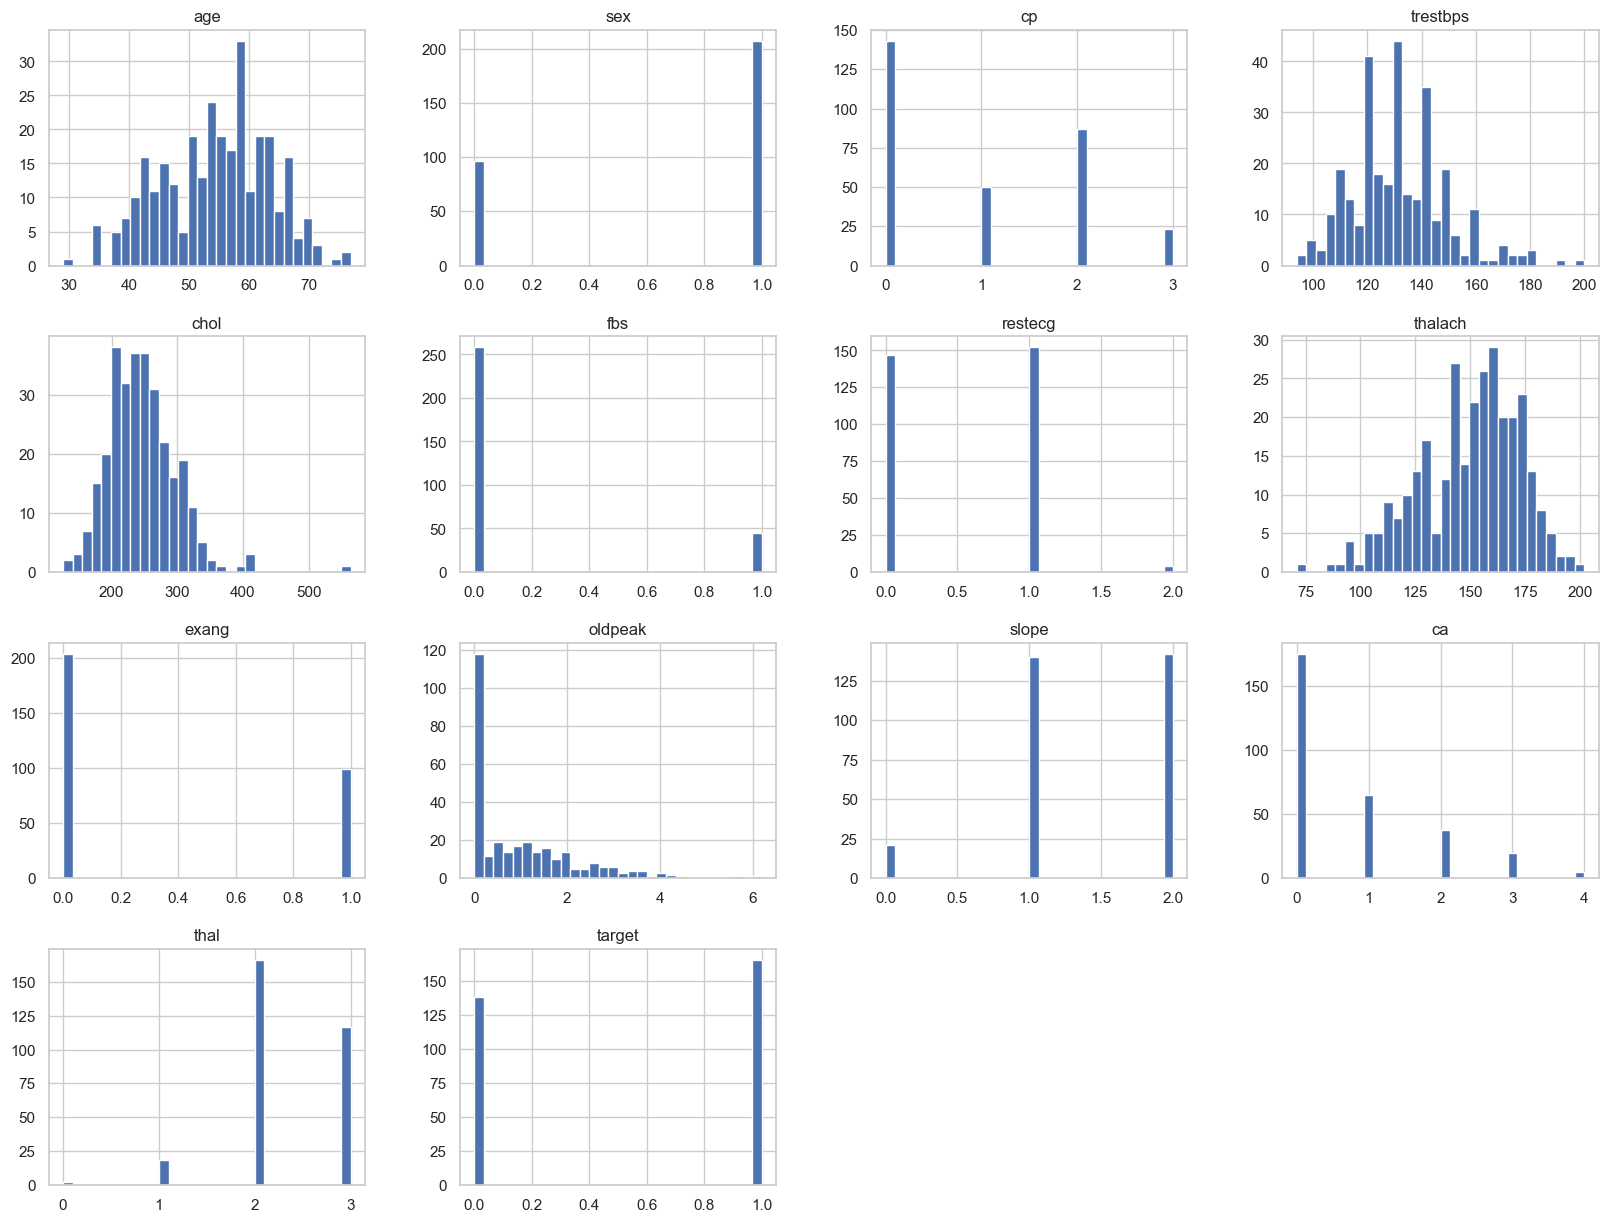

In [4]:
## Quick Overview of dataset

df.hist(bins=30, figsize=(20,15))
plt.show()

From the general overview of the heart disease data we can see that:
* 5 features are continuous (age, trestbps, chol, thalach, oldpeak)
* 9 features are categorical (sex, cp, fps, restecg, exang, slope, ca, thal, target)

In [5]:
## Summary statistics

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Univariate Analysis

In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights

In [6]:
def cat_plot_distribution(df, column:str, title:str, xlabel:str):
    """
    Plots a distribution of a column in a dataframe.

    Args:
        df (_type_): dataframe_
        column (str): column of interset
        title (str): Title of the plot
        xlabel (str): X-Axis labels
    """

    print(df[column].value_counts())

    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of patients')
    df[column].value_counts().plot(kind='bar', color = ['salmon', 'steelblue'])
    plt.xticks(rotation=0)
    plt.show()


def plot_distributions(df, column: str, title: str, xlabel: str, ylabel:str):
    """
    Plots a distribution of a column in a dataframe.

    Args:
        df (_type_): Dataframe containing the column of interest
        column (_type_): Column of interset
        title (_type_): Title of the plot
    """

    print(df[column].describe())

    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[column], ax=ax_box, color = 'salmon', orient='h')
    sns.histplot(df[column], bins=30, ax=ax_hist, color = 'steelblue', kde=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xticks()
    fig.suptitle(title)
    

**1. Age**

> The age column identifies the ages of each patient in the dataset

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


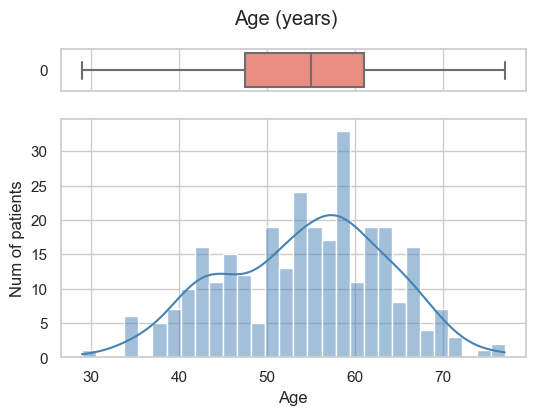

In [7]:
# Visualize the distribution
plot_distributions(df, 'age', 'Age (years)', xlabel="Age", ylabel="Num of patients")

The `age` column appears to be relatively close to a normal distributin but has a minor second peak at around 40 years. However despite the slight peak, most of the patients in this dataset fall between the ages 47.5 and 61.

**2. Sex**
> Sex of the patient (0 - female, 1 - male)

sex
1    207
0     96
Name: count, dtype: int64


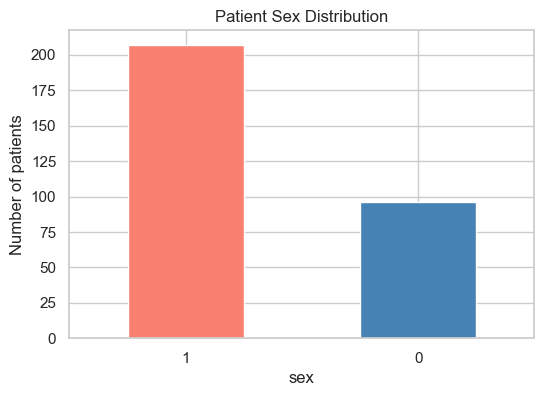

In [8]:
cat_plot_distribution(df=df, column="sex", title="Patient Sex Distribution", 
                      xlabel="Sex")


From the distribution above, we see that there are more males in the dataset compared to females by approximately 2:1

**3. cp** <br>
Chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart

    1: Atypical angina: chest pain not related to heart

    2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    3: Asymptomatic: chest pain not showing signs of disease

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64


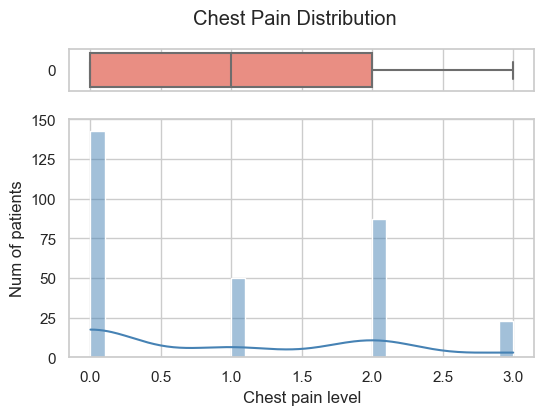

In [9]:
plot_distributions(df, column="cp", title="Chest Pain Distribution",
                   xlabel="Chest pain level", ylabel="Num of patients")

**4. trestbps**
> resting blood pressure
- Anything above 130-140 is a cause for concert

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


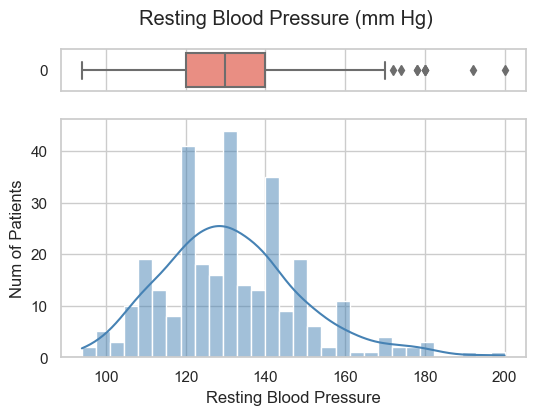

In [10]:
plot_distributions(df, column="trestbps", title="Resting Blood Pressure (mm Hg)",
                   xlabel ="Resting Blood Pressure", ylabel = "Num of Patients")

From the bove distribution we see that the resting blood pressure is slightly skewed to the right. This means that there are a number of patients who have a resting blood pressure above the median at 130 and 75% percentile at 140. 

The average resting blood pressure is 131.6 which is basically identical to the median which means that this distribution is a normal distribution just with a long right tail.

**5. chol**
> Cholestrol level of the patients

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


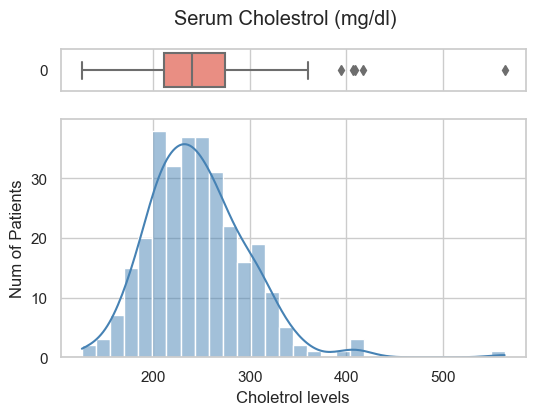

In [11]:
plot_distributions(df, column="chol", title="Serum Cholestrol (mg/dl)",
                   xlabel="Choletrol levels", ylabel="Num of Patients")

Similarly to the resting blood pressure, the average and median cholestrol level of the patients is quite close to each other meaning that its close to a normal distribution. However, it's important to note that the data is skewed to the right. 

This column however, will need to be analyzed further as the outliers seem to be quite high which is a cause for concern.

**6. fps**
> Fasting blood sugar

fbs
0    258
1     45
Name: count, dtype: int64


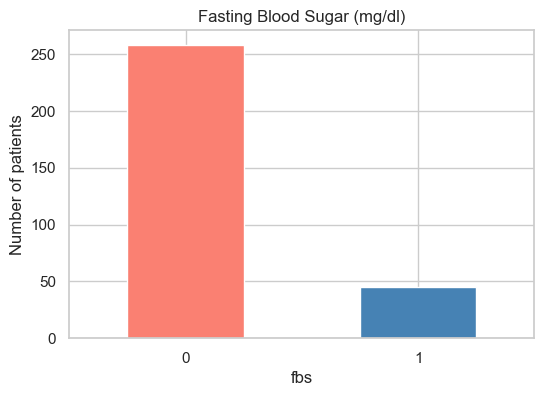

In [12]:
cat_plot_distribution(df, column="fbs", title="Fasting Blood Sugar (mg/dl)",
                      xlabel="0 = True, 1 = False")

The distribution above is used to show the fasting blood sugar levels of the patients. 0 shows the number of patients with a fasting blood sugar level above 120mg/dl. 
It'll be important to analyze this column further as fbs > 126 signals diabetes, and there are so many patients with a fbs > 120


**7. restecg**
> resting electrocardiographic results

A non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64


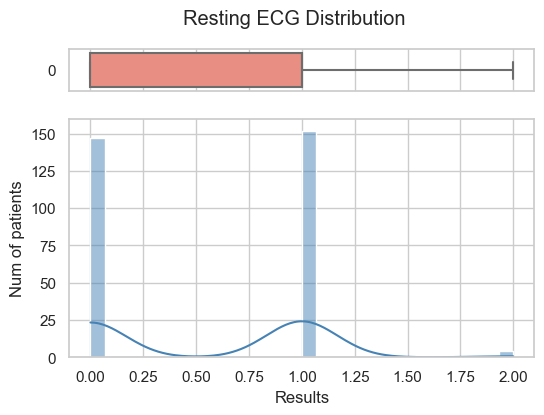

In [13]:
plot_distributions(df, column="restecg", title="Resting ECG Distribution", 
                   xlabel="Results", ylabel="Num of patients")

The data above shows that the resting ECG of over 99% of the patients in this dataset is either 0 or 1.

0 -> Nothing to note <br>
1 -> ST-T Wave abnormality (signals non-normal heart beat) <br>
2 -> Possible or definite left ventricular hypertrophy

**8. Thalach**
> Maximum heart rate achieved

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


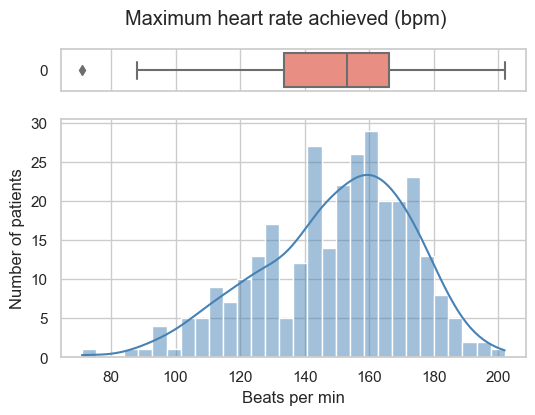

In [14]:
plot_distributions(df, column="thalach", title="Maximum heart rate achieved (bpm)",
                   xlabel="Beats per min", ylabel="Number of patients")

The distribution above shows that the average maximum heart rate achieved by the patients is 149 beats per minute (bpm). The data is skewed to the left with at least 25% of the patients having a maximum heart rate of less than 133 bpm.

**9. Exang**
> Exercise Induced Angina

Pain in the chest when exercising, it goes away when they rest

exang
0    204
1     99
Name: count, dtype: int64


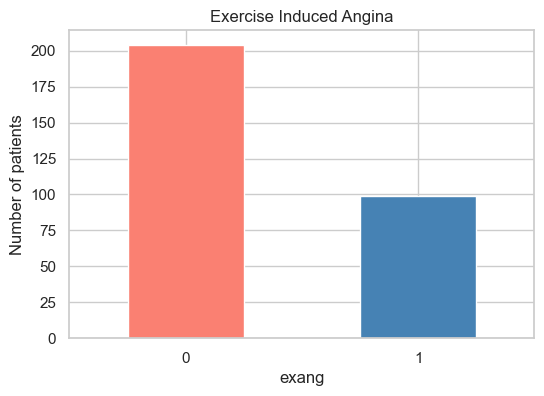

In [15]:
cat_plot_distribution(df, column="exang", title="Exercise Induced Angina",
                      xlabel="1 = Yes, 2 = No")

From the distribution above we see that most of the patients didn't experience pain when exercising. It'll be beneficial to check and see what proportion of patients who experienced pain had heart disease

**10. Oldpeak**
> stress of heart during excercise unhealthy heart will stress more

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


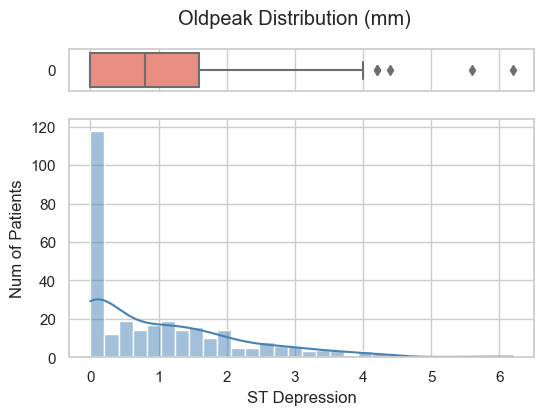

In [16]:
plot_distributions(df, column="oldpeak", title="Oldpeak Distribution (mm)",
                   xlabel="ST Depression", ylabel="Num of Patients")

The intensity of the exercise gradually increases, and the patient's heart rate and blood pressure are monitored continuously. The amount of ST segment depression, referred to as "oldpeak," is measured in millimeters (mm) below the baseline. The greater the oldpeak, the more significant the indication of potential coronary artery disease. From the distribution above we see that most of the patients had relatively normal oldpeak rates at 0 but a number of them had an oldpeak greater than 0 skewing the data to the right.

**11. Slope**
> the slope of the peak exercise ST segment

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64


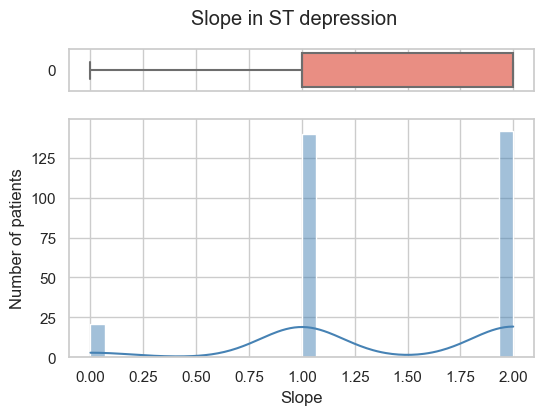

In [17]:
plot_distributions(df, column="slope", title="Slope in ST depression",
                   xlabel="Slope", ylabel="Number of patients")

0: Upsloping: better heart rate with excercise (uncommon) <br>
1: Flatsloping: minimal change (typical healthy heart) <br>
2: Downslopins: signs of unhealthy heart

From the distribution above, we see that the number of patients with downslopins (2) and flatsloping (1) are quite identical.

**12. ca**
> Coronary angiography is a medical imaging technique that involves injecting a contrast dye into the coronary arteries and taking X-ray images to visualize the blood flow and any potential blockages or abnormalities in the coronary arteries

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64


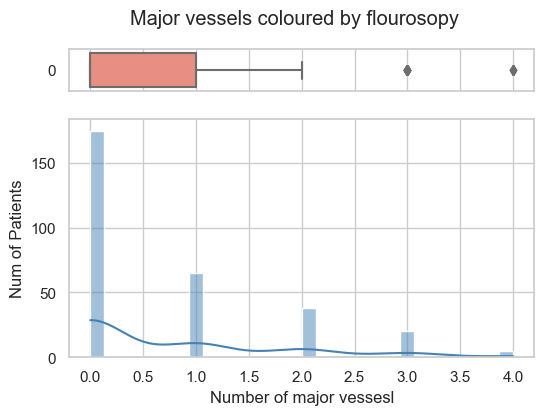

In [18]:
plot_distributions(df, column="ca", title="Major vessels coloured by flourosopy",
                   xlabel="Number of major vessesl", ylabel="Num of Patients")

From the distribution above we see that a good portion of the patients major vessels showed no blockage or narrowing (0). The number of affected vessels is an essential factor in assessing the severity of coronary artery disease and helps guide treatment decisions. A higher number of affected vessels may suggest more extensive and severe disease.


**13. thal**
> thalium stress result

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64


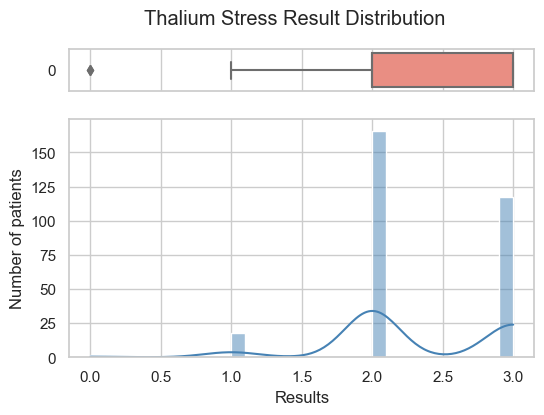

In [19]:
plot_distributions(df, column="thal", title="Thalium Stress Result Distribution",
                   xlabel="Results", ylabel="Number of patients")

**Target**
> Whether the patients have heart disease or not (0 = no, 1 = yes)

target
1    165
0    138
Name: count, dtype: int64


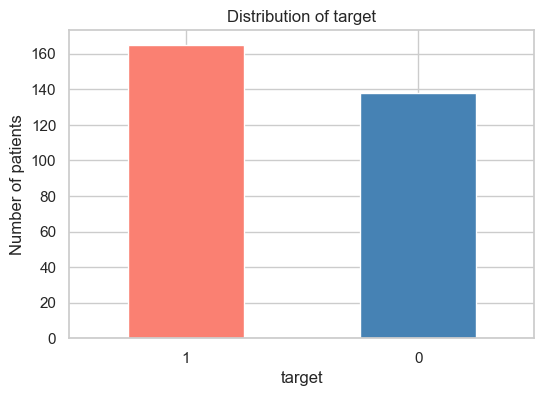

In [20]:
## Target column analysis

cat_plot_distribution(df, column="target", title="Distribution of target",
                      xlabel="0 = No Disease, 1 = Disease")


### Bivariate Analysis

- This section is going to compare some variables against each other.

**Heart Disease Frequency according to Sex**

In [21]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


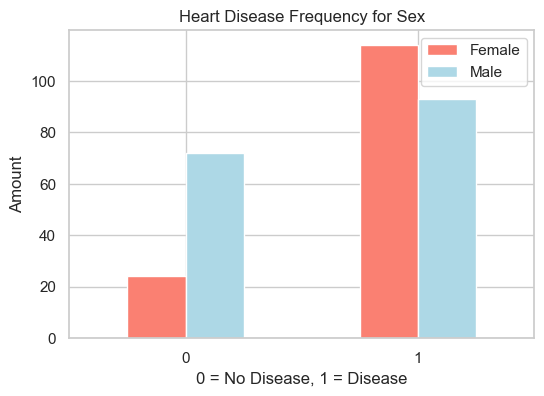

In [22]:
pd.crosstab(df["sex"], df["target"]).plot(kind="bar",
                                          figsize=(6,4),
                                          color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

Based of the above visualization and table, we can infer that approximately 45% (93/207) of the male patients have heart disease, while 75% (72/96) of the female patients have heart disease

**Heart Disease, Age and Cholestrol Levels**

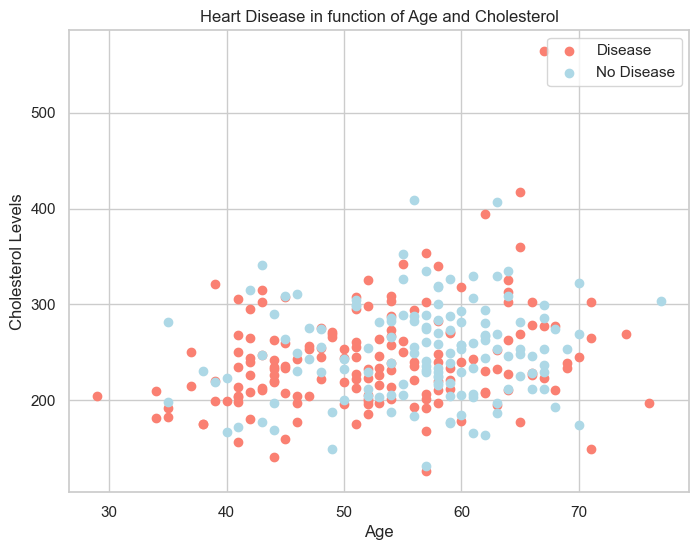

In [23]:
plt.figure(figsize=(8,6))

plt.scatter(df["age"][df["target"]==1], 
            df["chol"][df["target"]==1],
            c="salmon")

plt.scatter(df["age"][df["target"]==0], 
            df["chol"][df["target"]==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol Levels")
plt.legend(["Disease", "No Disease"]);

From the distribution there is no clear and obvious trend between cholestrol levels of a patient and their age. We can't accurately make a prediction as to what cholestrol level would increase your chances of heart disease but with additional features a machine model may be able to do so.

**Comparing resting heart rate and target**

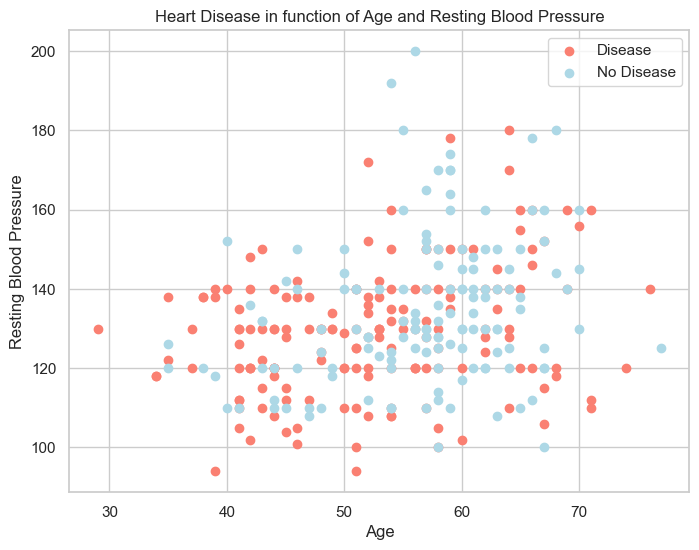

In [24]:
plt.figure(figsize=(8, 6))

plt.scatter(df.age[df.target==1],
            df.trestbps[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.trestbps[df.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Disease", "No Disease"]);

From the distribution above, there is no clear and obvious trend between someones age, their resting blood pressure and their likelihood of having heart disease.

## 3. Pipeline Construction
This section involves contructing our model pipeline and testing our each classifier model to have as our starting base model

In [25]:
df.columns.str.strip()

# Split the data into X and y

X = df.drop("target", axis =1)
y = df["target"]

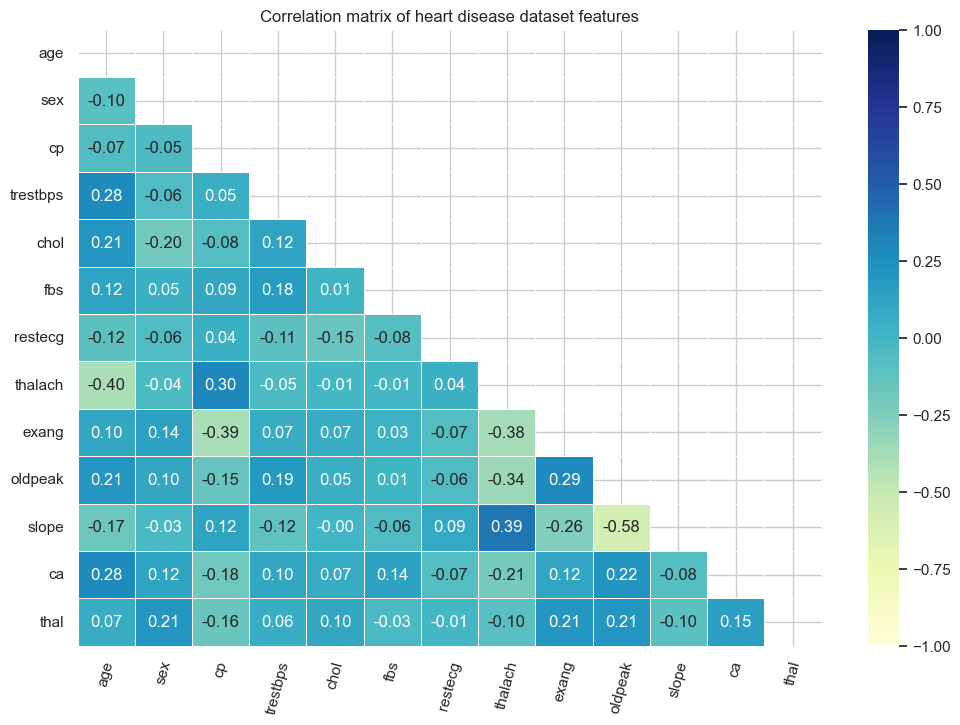

In [26]:
## Compute correlation matrix
corr_matrix = X.corr()

## Swt up the figure
fig, ax = plt.subplots(figsize=(12, 8))

## Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 mask=mask,
                 fmt=".2f",
                 cmap="YlGnBu",
                 vmin=-1,
                 vmax=1)
plt.title("Correlation matrix of heart disease dataset features")
plt.xticks(rotation=75);

None of the values in the corr_matrix are high or dependent on other features so no action will be taken and we can build the model

### Model Selection

In order to achieve the target stated in the evaluation of correctly predictin 95% of our data. The following are the models we wiil use and compare their respective results:
> Random Forest <br>
> Logistic Regression <br>
> K Nearest Neighbors

In [27]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [28]:
##n Defining features and their transformer pipeline

categorical_features = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]
continuous_features = ["age","trestbps","chol","thalach","oldpeak"]
target_features = ["target"]

np.random.seed(1234)

# Setting up the transformers
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

continuous_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

target_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Setting up the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("cont", continuous_transformer, continuous_features),
    #("target", target_transformer, target_features)
])

# Setting up the classifier pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2)

# Fit the model
model.fit(X_train, y_train)

# Score the model
rf_accuracy = model.score(X_test, y_test)
print(f"Accuracy: {rf_accuracy:.2f}")

Accuracy: 0.74


In [29]:
## Dictionary to keep track of scores

model_scores = {}

model_scores["Random Forest"] = rf_accuracy

In [30]:
## Retrying the model with KNN
np.random.seed(1234)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

## Fit the new model
model.fit(X_train, y_train)

## Score model
model.score(X_test, y_test)
print(f"Accuracy: {rf_accuracy}")

Accuracy: 0.7377049180327869


This score is exactly the same as the Random Forest, so we'll inspect the preprocessed data a bit more closely

In [31]:
np.random.seed(1234)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# fitting preprocessor on the train set
preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)

# Get the feature names after transformation from the preprocessor
cat_encoder = preprocessor.named_transformers_['cat']['one_hot']
cat_feature_names = cat_encoder.get_feature_names_out(input_features=categorical_features)
all_feature_names = cat_feature_names.tolist() + continuous_features

# Convert the preprocessed features to a DataFrame for inspection
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)

# Print the preprocessed features
print(X_train_preprocessed_df.head())

   sex_0  sex_1  cp_0  cp_1  cp_2  cp_3  fbs_0  fbs_1  restecg_0  restecg_1  \
0    1.0    0.0   1.0   0.0   0.0   0.0    0.0    1.0        0.0        1.0   
1    0.0    1.0   1.0   0.0   0.0   0.0    1.0    0.0        1.0        0.0   
2    1.0    0.0   0.0   0.0   1.0   0.0    1.0    0.0        0.0        1.0   
3    1.0    0.0   1.0   0.0   0.0   0.0    1.0    0.0        0.0        1.0   
4    0.0    1.0   0.0   0.0   1.0   0.0    1.0    0.0        0.0        1.0   

   ...  ca_4  thal_0  thal_1  thal_2  thal_3       age  trestbps      chol  \
0  ...   0.0     0.0     0.0     0.0     1.0  1.272466  2.618211 -0.367482   
1  ...   0.0     0.0     0.0     0.0     1.0  0.376650 -0.214692  0.203531   
2  ...   0.0     0.0     0.0     0.0     1.0  1.048512  0.465205  1.198198   
3  ...   0.0     0.0     0.0     1.0     0.0  1.048512  2.731527  1.419235   
4  ...   0.0     0.0     0.0     1.0     0.0 -1.414983 -0.101376 -1.251630   

    thalach   oldpeak  
0  0.682012 -0.079161  
1 -0.825

The data looks good for fitting and scoring a model as the categorical columns are one_hot_encoded properly and the continous features are scaled.

In [32]:
# Fitting the model and seeing if we get the same score
np.random.seed(1234)

model.fit(X_train, y_train)
knn_model = model.score(X_test, y_test)

print(f"KNN: {knn_model:.2f}")

KNN: 0.75


In [33]:
model_scores["KNN"] = knn_model
model_scores

{'Random Forest': 0.7377049180327869, 'KNN': 0.7540983606557377}

In [34]:
## Laslty trying out a logistic regression
np.random.seed(1234)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

## Fit and score model
model.fit(X_train, y_train)
log_model = model.score(X_test, y_test)

print(f"Logreg: {log_model}")

Logreg: 0.8032786885245902


In [40]:
model_scores["Logistic Regression"] = log_model
model_scores

{'Random Forest': 0.7377049180327869,
 'KNN': 0.7540983606557377,
 'Logistic Regression': 0.8032786885245902}

**Evaluating Base Model**

We'll use multiple evaluation metrics to evaluate the performance of the base model. <br>
We'll use:
- Precision score
- Recall score
- F1 score

In [ ]:
## Random forest

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

## Calculating the other metrics
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)




In [84]:
## function to make the evaluation process seamless

def evaluate_pipeline_classifier(pipeline:Pipeline, X_train:np.ndarray, X_test:np.ndarray, y_train:np.ndarray):
    """
    Evaluates a pipeline given the training and test data

    Args:
        pipeline (Pipeline): The pipeline containing the preprocessor and classifier.
        X_train (np.ndarray): Training data features.
        y_train (np.ndarray): Training data target labels.
        X_test (np.ndarray): Test data features.
        classifier_name (str): Name of classifier

    Returns:
        dict: A dictionary containing the evaluation metrics.
    """

    # Fit the data
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_preds = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test,  y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

    # Compile evaluation metrics to dictionary

    eval_metrics = {
        #"Classifer name": classifier_name,
        "Accuracy":accuracy *100,
        "Precision":precision *100,
        "Recall":recall *100,
        "f1_score":f1 *100
    }

    return eval_metrics

In [85]:
## Evaluating RandomForest
np.random.seed(1234)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifer", RandomForestClassifier())
])

rf_results = evaluate_pipeline_classifier(model, X_train, X_test, y_train)
rf_results

{'Accuracy': 77.04918032786885,
 'Precision': 74.35897435897436,
 'Recall': 87.87878787878788,
 'f1_score': 80.55555555555556}

In [86]:
## Evaluating KNN
np.random.seed(1234)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifer", KNeighborsClassifier())
])

knn_results = evaluate_pipeline_classifier(model, X_train, X_test, y_train)
knn_results

{'Accuracy': 75.40983606557377,
 'Precision': 73.68421052631578,
 'Recall': 84.84848484848484,
 'f1_score': 78.87323943661973}

In [87]:
## Evaluating LogisticRegression
np.random.seed(1234)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifer", LogisticRegression())
])

logreg_results = evaluate_pipeline_classifier(model, X_train, X_test, y_train)
logreg_results

{'Accuracy': 80.32786885245902,
 'Precision': 78.37837837837837,
 'Recall': 87.87878787878788,
 'f1_score': 82.85714285714285}

In [88]:
compare_metrics = pd.DataFrame({"Random Forest": rf_results,
                                "KNN": knn_results,
                                "Logistic Regression": logreg_results})
compare_metrics

,Random Forest,KNN,Logistic Regression
Accuracy,77.049180,75.409836,80.327869
Precision,74.358974,73.684211,78.378378
Recall,87.878788,84.848485,87.878788
f1_score,80.555556,78.873239,82.857143


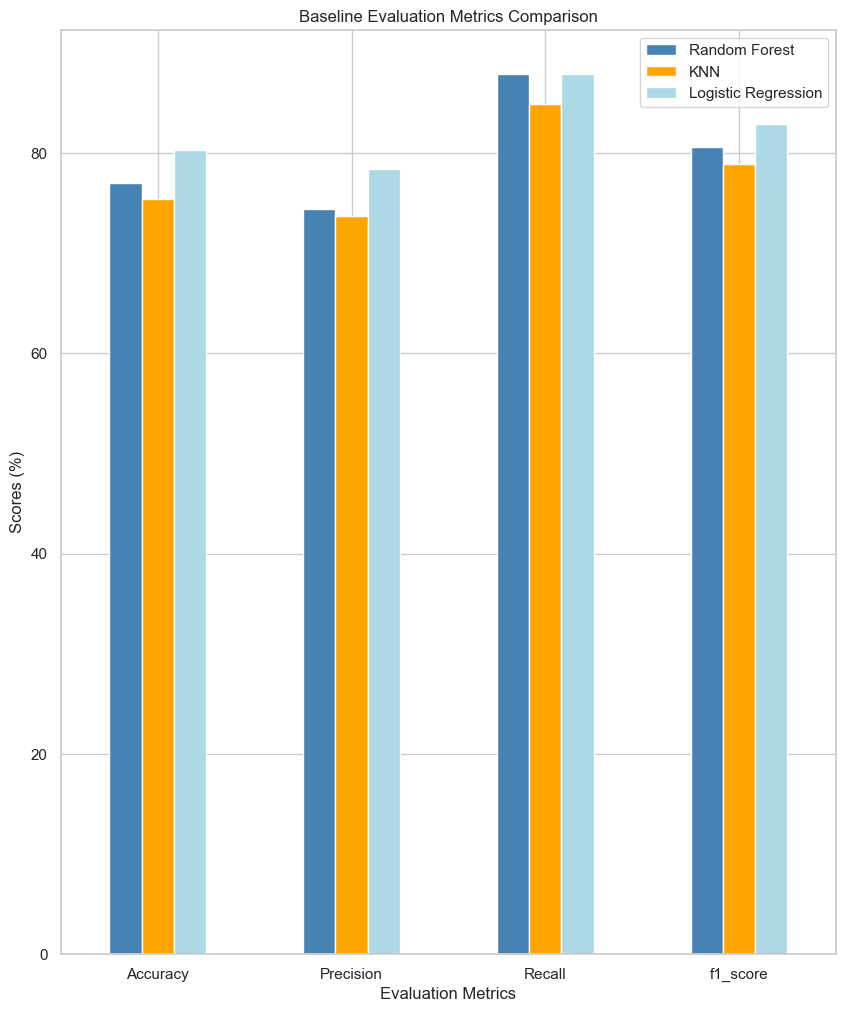

In [92]:

compare_metrics.plot.bar(figsize=(10,12),
                         color=["steelblue", "orange","lightblue"])
plt.title("Baseline Evaluation Metrics Comparison")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Scores (%)")
plt.xticks(rotation=0);

From the above visualization we see that logistic regression has a better accuracy, precision and f1 score compared to all the other models. 

### Hyperparamer Tuning

This step will change various hyperparameters on the 3 models and see how their respective scores change.